In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#%pip install seaborn
import seaborn as sns

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)

file_path = 'https://raw.githubusercontent.com/ayabongatshitshi-lab/Data-Science-Projects/refs/heads/main/PageViews/fcc-forum-pageviews.csv'

df = pd.read_csv(file_path,
                 parse_dates=[0],
                 index_col=[0] )
df.tail()

,value
date,
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918
2019-12-02,220144
2019-12-03,158549


In [3]:
# Clean data
## data values between quantile 0.025 and 0.975. ..

df = df[ (df['value'] <= df['value'].quantile(0.975)) &
        (df['value'] >= df['value'].quantile(0.025)) ]

Text(0, 0.5, 'Page Views')

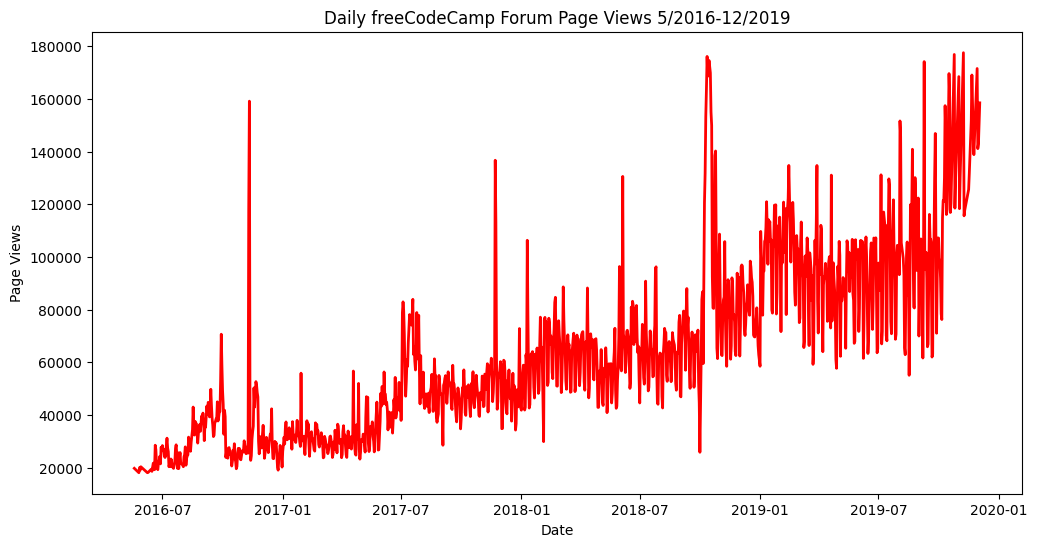

In [4]:
# Draw line plot (plot using OOP interface, to be able to call back on the plot)

fig,ax=plt.subplots(figsize=(12,6))
ax.plot(df, c='r',linewidth=2)    ## can also use sns.lineplot
ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
ax.set_xlabel("Date")
ax.set_ylabel("Page Views")

In [5]:
fig.savefig('LineFig1')

In [6]:
df_bar = df.copy()
df_bar['Years'] = df.index.year
df_bar['Months'] = df.index.month_name()  ## name all months

## rearrange and group (take mean of all values for each day in that each month by .mean())
df_bar_group = df_bar.groupby(['Years','Months'])['value'].mean()
## 'unstack' data - from vert. to hor. table format...for each yr as a row, see each value for each month...better format
df_bar_group =df_bar_group.unstack('Months')
df_bar_group = df_bar_group[ ['January', 'February', 'March', 'April', 'May',
                                'June', 'July', 'August', 'September', 'October', 'November', 'December'] ]  ## order of months
df_bar_group

Months,January,February,March,April,May,June,July,August,September,October,November,December
Years,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


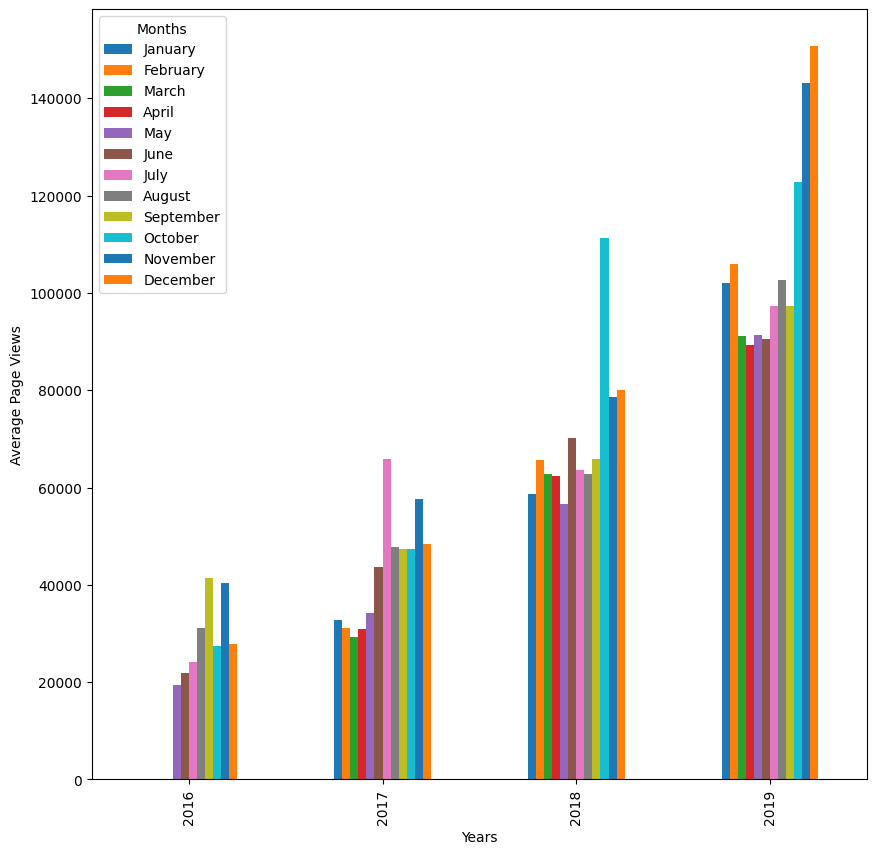

In [7]:
bar = df_bar_group.plot.bar(figsize=(10,10))
bar.set_xlabel("Years")
bar.set_ylabel('Average Page Views')
bar.legend(title='Months')

fig = bar.figure

In [8]:
fig.savefig('BarFig2')

In [9]:
df_bar=df.copy()
df_bar["Years"]=df_bar.index.year
df_bar["Months"]=df_bar.index.month_name()   ## name all months
df_bar = pd.DataFrame( df_bar.groupby(["Years","Months"], sort=False)["value"].mean().round().astype(int) )
## take mean of all values for each day in that each month by .mean(), round it up, make it an int
df_bar = df_bar.rename(columns={"value":"Average Page Views"})
df_bar = df_bar.reset_index()

missing = pd.DataFrame({ "Years": [2016,2016,2016,2016],
           "Months": ["January","February","March","April"],
           "Average Page Views": [0,0,0,0] })   ## since 2016 starts with May, set all prev months on 0 views...

df_bar = pd.concat([missing, df_bar]).reset_index()
df_bar = df_bar.drop(columns='index')
df_bar

,Years,Months,Average Page Views
0,2016,January,0
1,2016,February,0
2,2016,March,0
3,2016,April,0
4,2016,May,19432
5,2016,June,21875
6,2016,July,24110
7,2016,August,31049
8,2016,September,41477
9,2016,October,27398


([0, 1, 2, 3],
 [Text(0, 0, '2016'),
  Text(1, 0, '2017'),
  Text(2, 0, '2018'),
  Text(3, 0, '2019')])

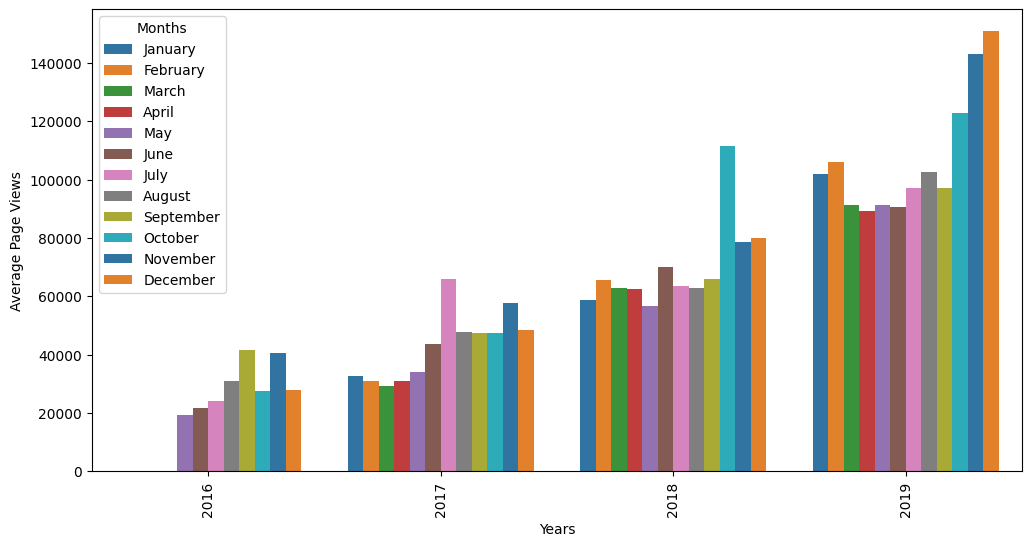

In [10]:
fig,ax = plt.subplots(figsize=(12,6))
ax = sns.barplot(df_bar, x="Years", y="Average Page Views", hue="Months", palette='tab10')
plt.xticks(rotation=90)

In [11]:
fig.savefig('BarFig2')

In [12]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]   ## for each date, tale the year...
df_box['month'] = [d.strftime('%b') for d in df_box.date]   ## convert from time to str format, take month: strftime('%b')

df_box

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


/tmp/ipython-input-4185577673.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df_box, x='year', y='value', palette='tab10', ax=ax[0])
/tmp/ipython-input-4185577673.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df_box, x='month', y='value', palette='tab10', ax=ax[1], order=order)


Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')

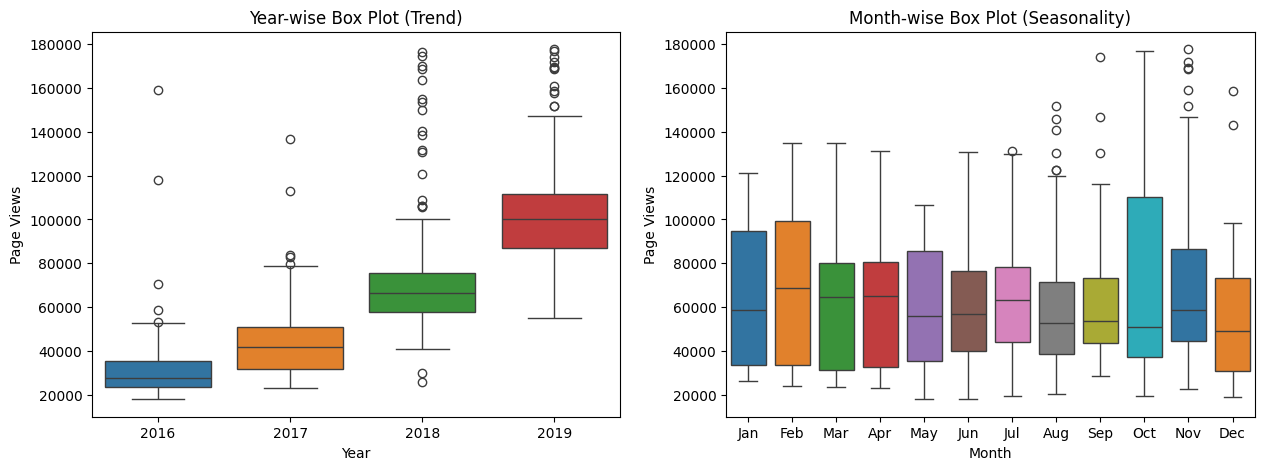

In [13]:
fig, ax =plt.subplots(1, 2, figsize=(15,5))

sns.boxplot(df_box, x='year', y='value', palette='tab10', ax=ax[0])
ax[0].set_ylabel('Page Views')
ax[0].set_xlabel('Year')
ax[0].set_title('Year-wise Box Plot (Trend)')

order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.boxplot(df_box, x='month', y='value', palette='tab10', ax=ax[1], order=order)
ax[1].set_ylabel('Page Views')
ax[1].set_xlabel('Month')
ax[1].set_title('Month-wise Box Plot (Seasonality)')

In [14]:
fig.savefig('BoxFig3')